In [8]:

import pandas as pd
import matplotlib as plt
p2011 = pd.read_csv("./data/Earnings/employee-earnings-report-2011.csv", thousands=',', encoding = 'ISO-8859-1')
p2012 = pd.read_csv("./data/Earnings/employee-earnings-report-2012.csv", thousands=',', encoding = 'ISO-8859-1')
p2013 = pd.read_csv("./data/Earnings/employee-earnings-report-2013.csv", thousands=',' ,encoding = 'ISO-8859-1')
p2014 = pd.read_csv("./data/Earnings/employee-earnings-report-2014.csv", thousands=',', encoding = 'ISO-8859-1')
p2015 = pd.read_csv("./data/Earnings/employee-earnings-report-2015.csv", thousands=',', encoding = 'ISO-8859-1')
p2016 = pd.read_csv("./data/Earnings/employee-earnings-report-2016.csv", thousands=',', encoding = 'ISO-8859-1')
p2017 = pd.read_csv("./data/Earnings/employee-earnings-report-2017.csv", thousands=',', encoding = 'ISO-8859-1')
p2018 = pd.read_csv("./data/Earnings/employeeearningscy18full.csv", encoding="ISO-8859-1", encoding_errors="ignore", thousands=',' )
p2019 = pd.read_csv("./data/Earnings/allemployeescy2019_feb19_20final-all.csv", thousands=',', encoding = 'ISO-8859-1')
p2020 = pd.read_csv("./data/Earnings/city-of-boston-calendar-year-2020-earnings.csv", thousands=',', encoding = 'ISO-8859-1')
p2021 = pd.read_csv("./data/Earnings/employee-earnings-report-2021.csv", encoding='ISO-8859-1', thousands=',')
p2022 = pd.read_csv("./data/Earnings/finalconsolidatedcy22earnings_feb2023.xlsx-sheet1.csv", thousands=',', encoding = 'ISO-8859-1')

p2011["Year"] = 2011
p2012["Year"] = 2012
p2013["Year"] = 2013
p2014["Year"] = 2014
p2015["Year"] = 2015
p2016["Year"] = 2016
p2017["Year"] = 2017
p2018["Year"] = 2018
p2019["Year"] = 2019
p2020["Year"] = 2020
p2021["Year"] = 2021
p2022["Year"] = 2022
p2021.rename({"total_gross":"total earnings"})
p2022.rename({"total_gross":"total earnings"})
p2022.head()
ys = p2021.rename(columns={"total_gross":"total earnings"})
xs = p2022.rename(columns={"total_gross":"total earnings"})
l = [p2011, p2012, p2013, p2014, p2015, p2016, p2017, p2018, p2019, p2020]
l2 = [p2021, p2022]
for x in l:
    x.columns = map(str.lower, x.columns)
    x.columns = map(str.strip, x.columns)
    y = ["regular", "retro", "other", "overtime", "injured", "detail", "total earnings"]
    for a in y:
        try:
            x[a] = pd.to_numeric(x[a], errors="raise")
        except:
            x[a] = x[a].str.strip()
            x[a] = x[a].str.replace('"', '')
            x[a] = x[a].str.replace(',', '')
            x[a] = x[a].str.replace('$', '')
            x[a] = x[a].str.replace('(', '')
            x[a] = x[a].str.replace(')', '')
            x[a] = x[a].str.replace('-', '')
            x[a] = pd.to_numeric(x[a], errors="coerce")
            
for x in l2:
    x.columns = map(str.lower, x.columns)
    x.columns = map(str.strip, x.columns)
    y = ["regular", "retro", "other", "overtime", "injured", "total_gross"]
    for a in y:
        try:
            x[a] = pd.to_numeric(x[a], errors="raise")
        except:
            x[a] = x[a].str.strip()
            x[a] = x[a].str.replace('"', '')
            x[a] = x[a].str.replace(',', '')
            x[a] = x[a].str.replace('$', '')
            x[a] = x[a].str.replace('(', '')
            x[a] = x[a].str.replace(')', '')
            x[a] = x[a].str.replace('-', '')
            x[a] = pd.to_numeric(x[a], errors="coerce")
y = p2021.rename(columns={"total_gross":"total earnings"})
x = p2022.rename(columns={"total_gross":"total earnings"})

combined = pd.concat([p2011, p2012, p2013, p2014, p2015, p2016, p2017, p2018, p2019, p2020, y, x], axis=0)
combined[combined["year"] == 2021].head()
#combined["Total Earnings"] = combined["Total Earnings"].str[1:]
#combined["Total Earnings"] = combined["Total Earnings"].astype(float)
y = ["regular", "retro", "other", "overtime", "injured", "detail", "quinn", "total earnings"]
'''
for x in y:
    try:
        combined[x] = pd.to_numeric(combined[x], errors="raise")
    except:
        combined[x] = combined[x].str.strip()
        combined[x] = combined[x].str.replace('"', '')
        combined[x] = combined[x].str.replace(',', '')
        combined[x] = combined[x].str.replace('$', '')
        combined[x] = combined[x].str.replace('(', '')
        combined[x] = combined[x].str.replace(')', '')
        combined[x] = combined[x].str.replace('-', '')
        combined[x] = pd.to_numeric(combined[x], errors="coerce")
''' 
        
combined[combined["department"] == "Boston Police Department"].groupby("year")["total earnings"].sum().plot(kind="bar", title="Total BPD pay per year", ylabel="Pay in Billions")
#combined.groupby("year")["total earnings"].mean().plot(kind="bar")

print(combined[combined["department"] == "Boston Police Department"]["injured"].sum()/combined[combined["department"] == "Boston Police Department"]["total earnings"].sum())
police = combined[combined["department"] == "Boston Police Department"]
print(police[police["injured"] > 0].groupby("year")["injured"].count())
print("bpd average", police.groupby("year")["total earnings"].mean())
v = list(police.groupby("year")["total earnings"].sum())
print("overall average", combined.groupby("year")["total earnings"].mean())
print("percent overall injury", police["injured"].sum()/police["total earnings"].sum())


C:\Users\opres\AppData\Local\Temp\ipykernel_15312\3999015763.py:46: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  x[a] = x[a].str.replace('$', '')
C:\Users\opres\AppData\Local\Temp\ipykernel_15312\3999015763.py:47: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  x[a] = x[a].str.replace('(', '')
C:\Users\opres\AppData\Local\Temp\ipykernel_15312\3999015763.py:48: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  x[a] = x[a].str.replace(')', '')
C:\Users\opres\AppData\Local\Temp\ipykernel_15312\3999015763.py:46: FutureWarning: Th

KeyError: 'detail'

<Axes: xlabel='year'>

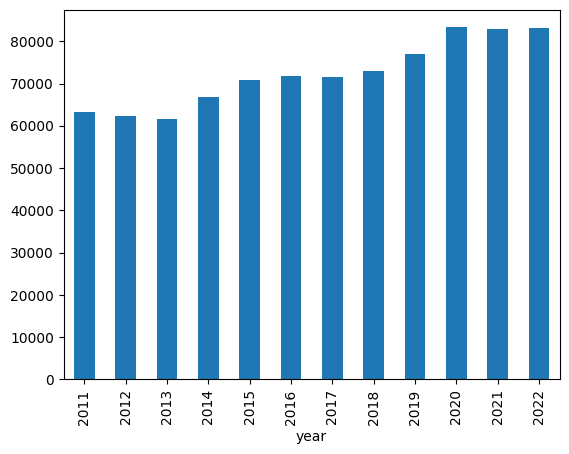

In [140]:
combined.groupby("year")["total earnings"].mean().plot(kind="bar")

In [ ]:

y = ["regular", "retro", "other", "overtime", "injured", "detail", "quinn", "total earnings"]
for x in y:
    try:
        combined[x] = pd.to_numeric(combined[x], errors="raise")
    except:
        combined[x] = combined[x].str.strip()
        combined[x] = combined[x].str.replace('"', '')
        combined[x] = combined[x].str.replace(',', '')
        combined[x] = combined[x].str.replace('$', '')
        combined[x] = combined[x].str.replace('(', '')
        combined[x] = combined[x].str.replace(')', '')
        combined[x] = combined[x].str.replace('-', '')
        combined[x] = pd.to_numeric(combined[x], errors="coerce")

[49, 49, 51, 239, 233, 228, 227, 227, 230, 227, 231, 232]


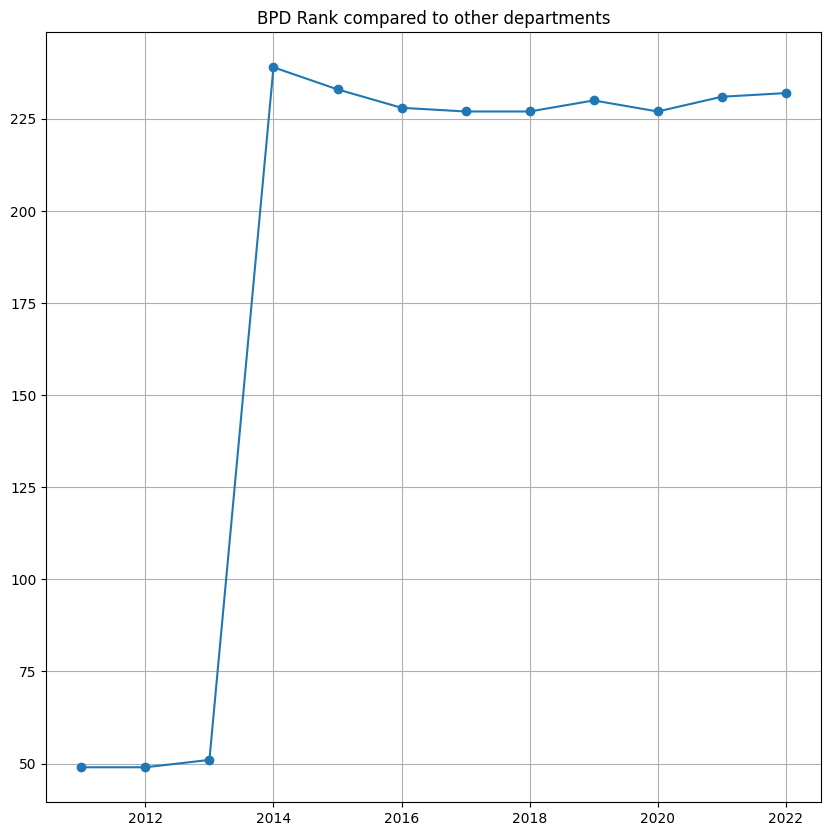

In [210]:
combined_depart = combined.groupby(['year', 'department'])['total earnings'].mean()
departments2012 = combined_depart.sort_values(ascending= False)
year = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
years = {2011: 0, 2012: 0, 2013: 0, 2014: 0, 2015: 0, 2016: 0, 2017: 0, 2018: 0, 2019: 0, 2020: 0, 2021: 0, 2022: 0}
def check(x, y):
    if y in year:
        years[y] += 1
        if y == "Boston Police Department":
            year.remove(y)
departments2012.reset_index().apply(lambda x: check(x["department"], x["year"]), axis=1)
departments2012.head()
print(list(years.values()))
year = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
fig, axes = plt.pyplot.subplots(1, 1, figsize=(10, 10))


axes.plot(year, list(years.values()), marker='o', linestyle='-')
axes.set_title("BPD Rank compared to other departments")
axes.grid(True)